# Principal Writer, Director, And Actor

### Imports and File Read-ins 

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#file locations
directors_file = "files/imbd_files/directors.csv"
known_for_file= "files/imbd_files/known_for.csv"
movie_akas_file = "files/imbd_files/movie_akas.csv"
movie_basics_file = "files/imbd_files/movie_basics.csv"
movie_ratings_file= "files/imbd_files/movie_ratings.csv"
persons_file = "files/imbd_files/persons.csv"
principals_file= "files/imbd_files/principals.csv"
writers_file = "files/imbd_files/writers.csv"

# read files into dataframes
directors = pd.read_csv(directors_file)
known_for = pd.read_csv(known_for_file)
movie_akas = pd.read_csv(movie_akas_file)
movie_basics = pd.read_csv(movie_basics_file)
movie_ratings = pd.read_csv(movie_ratings_file)
persons = pd.read_csv(persons_file)
principals = pd.read_csv(principals_file)
writers = pd.read_csv(writers_file)

# Read in Data For Revenue Section
budgets = pd.read_csv('Files/tn.movie_budgets.csv.gz')

# list of tables for reference
IMBD_df_list = ['directors', 'known_for', 'movie_akas', 'movie_basics', 'movie_ratings', 'persons', 'principals', 'writers']

#### Budget Preparation

## Top 100 Movies Based On Rating

In [4]:
# merge movie ratings with movie basics
movie_info = pd.merge(movie_basics, movie_ratings, how="inner", on='movie_id')

In [5]:
# View of DataFrame
movie_info.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [6]:
# movies sort by most votes and avereage rating
top_movies = movie_info.sort_values(by=['numvotes', 'averagerating'], ascending=False)
# top 100 movies selected
top_100_movies = top_movies.iloc[:100]
# top 100 movies sorted specifically by movie rating
top_100_movies = top_100_movies.sort_values(by='averagerating', ascending=False)
#index reseted for top 100 movies
top_100_movies = top_100_movies.reset_index().drop(columns='index')
# select columns renamed for consistency among columns
top_100_movies = top_100_movies.rename(columns={'numvotes': 'num_votes', 'averagerating': 'avg_rating'})
top_100_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         100 non-null    object 
 1   primary_title    100 non-null    object 
 2   original_title   100 non-null    object 
 3   start_year       100 non-null    int64  
 4   runtime_minutes  100 non-null    float64
 5   genres           100 non-null    object 
 6   avg_rating       100 non-null    float64
 7   num_votes        100 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 6.4+ KB


### Bar Graph of Top 100 Movies Based On Rating

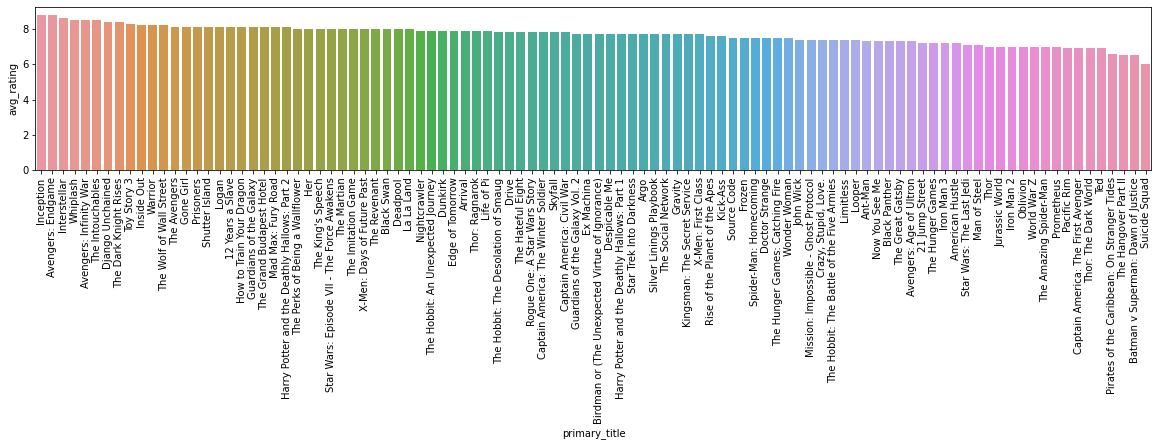

In [7]:
# bar plot for average rating of top 100 movies 
plt.figure(figsize = (20,3))
plt.xticks(rotation = 90)
sns.barplot(x=top_100_movies.primary_title, y=top_100_movies.avg_rating);

## Director Count in the Top 100 Movies Based on Popular Rating

In [8]:
# merge movie directors with top 100 movies
top_movie_dir = pd.merge(top_100_movies, directors, how="inner", on='movie_id')
# merge persons with top movie directors to get director names
top_movie_dir = pd.merge(top_movie_dir, persons, how="inner", on='person_id')
# drop irrelevant columns for readibility
top_movie_dir = top_movie_dir.drop(columns=['primary_profession', 'death_year', 'birth_year', 'genres', 'runtime_minutes', 'start_year', 'original_title'])
top_movie_dir.drop_duplicates(subset=['movie_id'], inplace=True)
top_movie_dir.head()

,movie_id,primary_title,avg_rating,num_votes,person_id,primary_name
0,tt1375666,Inception,8.8,1841066,nm0634240,Christopher Nolan
1,tt0816692,Interstellar,8.6,1299334,nm0634240,Christopher Nolan
3,tt1345836,The Dark Knight Rises,8.4,1387769,nm0634240,Christopher Nolan
7,tt5013056,Dunkirk,7.9,466580,nm0634240,Christopher Nolan
8,tt4154796,Avengers: Endgame,8.8,441135,nm0751577,Anthony Russo


In [9]:
# count of directors in top 100 movies
top_pop_director_counts = top_movie_dir.primary_name.value_counts().iloc[:20]
top_pop_director_counts

Anthony Russo            4
Christopher Nolan        4
Peter Jackson            3
Matthew Vaughn           3
James Gunn               2
Martin Scorsese          2
David O. Russell         2
Joss Whedon              2
Rian Johnson             2
David Yates              2
Quentin Tarantino        2
Alejandro G. Iñárritu    2
Denis Villeneuve         2
Damien Chazelle          2
David Fincher            2
J.J. Abrams              2
Zack Snyder              2
Ridley Scott             2
Gareth Edwards           1
Sam Mendes               1
Name: primary_name, dtype: int64

### Bar Graph of Director Count In Top 100 Movies Based on Popular Rating

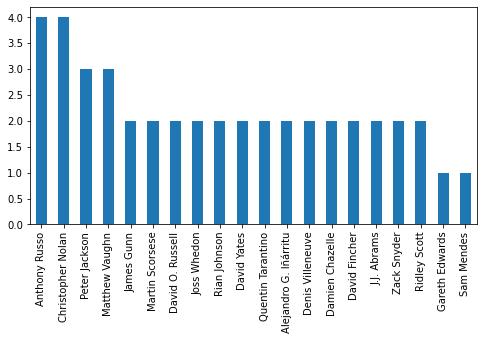

In [10]:
# bar plot of 20 top directors based on count in top 100 movies
top_pop_director_counts.plot(kind='bar', figsize=(8, 4));

## Writer Count In Top 100 Movies Based On Popular Rating

In [11]:
# merge movie writers with top 100 movies
top_writers = pd.merge(top_100_movies, writers, how="inner", on='movie_id')
# merge persons with top movie directors to get director names
top_writers = pd.merge(top_writers, persons, how="inner", on='person_id')
# drop irrelevant columns for readibility
top_writers = top_writers.drop(columns=['primary_profession', 'death_year', 'birth_year', 'genres', 'runtime_minutes', 'start_year', 'original_title'])
top_writers.head()

,movie_id,primary_title,avg_rating,num_votes,person_id,primary_name
0,tt1375666,Inception,8.8,1841066,nm0634240,Christopher Nolan
1,tt0816692,Interstellar,8.6,1299334,nm0634240,Christopher Nolan
2,tt1345836,The Dark Knight Rises,8.4,1387769,nm0634240,Christopher Nolan
3,tt5013056,Dunkirk,7.9,466580,nm0634240,Christopher Nolan
4,tt0770828,Man of Steel,7.1,647288,nm0634240,Christopher Nolan


In [12]:
# count of directors in top 100 movies
top_writers.drop_duplicates(subset=['movie_id'], inplace=True)
top_pop_writer_counts = top_writers.primary_name.value_counts().iloc[:20]
top_pop_writer_counts.head()

Stan Lee              13
Christopher Markus     6
Christopher Nolan      5
Michael Arndt          4
Fran Walsh             3
Name: primary_name, dtype: int64

### Writer Count In Top 100 Movies Based On Popular Rating

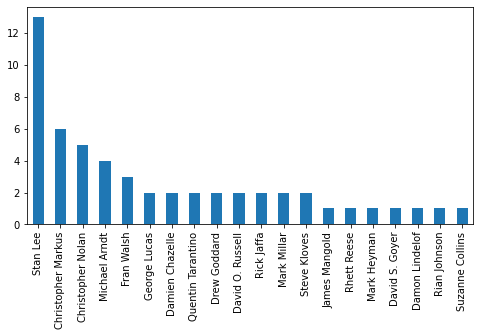

In [56]:
# bar plot of 20 top writers based on count in top 100 movies
top_pop_writer_counts.plot(kind='bar', figsize=(8, 4));

## Actor Count In Top 100 Movies Based On Popular Rating

In [14]:
# merge movie principals with top 100 movies
top_principals= pd.merge(top_100_movies, principals, how="inner", on='movie_id')
# merge persons with top principals table to get principal names
top_principals = pd.merge(top_principals, persons, how="inner", on='person_id')
# drop irrelevant columns for readibility
top_principals = top_principals.drop(columns=['primary_profession', 'death_year', 'birth_year', 'genres', 'runtime_minutes', 'start_year', 'original_title', 'job', 'characters'])

In [15]:
# filter top principals to get top principal actors
top_principal_actors = top_principals[(top_principals.category == 'actor') | (top_principals.category == 'actress')]
top_principal_actors.head()

,movie_id,primary_title,avg_rating,num_votes,ordering,person_id,category,primary_name
1,tt1375666,Inception,8.8,1841066,1,nm0000138,actor,Leonardo DiCaprio
2,tt1853728,Django Unchained,8.4,1211405,3,nm0000138,actor,Leonardo DiCaprio
3,tt0993846,The Wolf of Wall Street,8.2,1035358,1,nm0000138,actor,Leonardo DiCaprio
4,tt1130884,Shutter Island,8.1,1005960,1,nm0000138,actor,Leonardo DiCaprio
5,tt1663202,The Revenant,8.0,621193,1,nm0000138,actor,Leonardo DiCaprio


In [16]:
# count of principal actor appearing in top 100 movies
top_principal_actors.drop_duplicates(subset=['movie_id'], inplace=True)
top_pop_actor_counts = top_principal_actors.primary_name.value_counts().iloc[:20]
top_pop_actor_counts

<ipython-input-16-02443e92bfcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_principal_actors.drop_duplicates(subset=['movie_id'], inplace=True)


Robert Downey Jr.     8
Leonardo DiCaprio     6
Ben Affleck           3
Ian McKellen          3
Bradley Cooper        3
Tom Hardy             3
Hugh Jackman          3
Chris Pratt           3
Colin Firth           2
Mark Ruffalo          2
Chiwetel Ejiofor      2
Michael Fassbender    2
Chris Evans           2
Jennifer Lawrence     2
Jake Gyllenhaal       2
Jeremy Renner         2
Daniel Radcliffe      2
Ryan Gosling          2
Chris Hemsworth       2
Daisy Ridley          2
Name: primary_name, dtype: int64

### Bar Graph of Actor Count In Top 100 Movies Based On Popular Rating

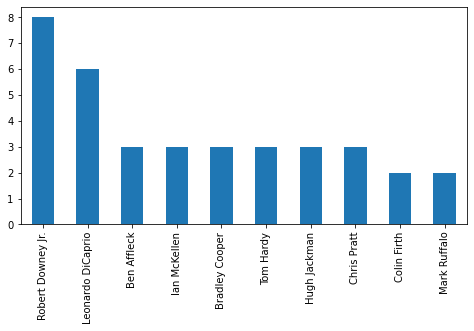

In [17]:
# bar plot of top 10 actors based on number of times they appear in the top 100 movies
top_pop_actor_counts.head(10).plot(kind='bar', figsize=(8, 4));

## Genre Count In Top 100 Movies Based On Popular Rating

In [18]:
# Declaring new variable to split genre data into separate columns
string_split = top_100_movies
# splitting genre values into new columns
genre_split = string_split["genres"].str.split(",", n = 3, expand = True)
# concatination genre columns into 1 series
top_100_movies_genres = pd.concat([genre_split[0], genre_split[1], genre_split[2]])
# drop na from genre series
top_100_movies_genres = top_100_movies_genres.dropna()
# counting genre counts in top 100 movie list
top_genre_counts = top_100_movies_genres.value_counts()
top_genre_counts

Adventure    57
Action       54
Sci-Fi       36
Drama        36
Comedy       20
Fantasy      16
Thriller     13
Crime        11
Mystery      11
Biography     8
Animation     5
Romance       4
History       3
Music         2
Family        2
Horror        1
Western       1
Sport         1
dtype: int64

### Bar Graph of Genre Count In Top 100 Movies Based On Popular Rating

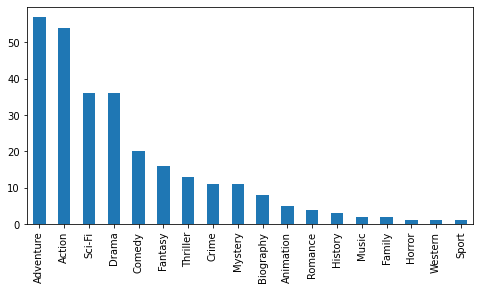

In [19]:
# bar plot of top genre counts from top 100 movies
top_genre_counts.plot(kind='bar', figsize=(8, 4));

# Top Movies Based On Revenue

### Preparation Of Revenues Data Frame

In [20]:
# Read in Data For Revenue Section
budgets = pd.read_csv('Files/tn.movie_budgets.csv.gz')
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [21]:
# Removing dollar signs from budget columns to allow for manipulation
budgets['production_budget'] = budgets['production_budget'].str.replace('$','')
budgets['domestic_gross'] = budgets['domestic_gross'].str.replace('$','')
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace('$','')
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"425,000,000","760,507,625","2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"350,000,000","42,762,350","149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747"


In [22]:
# Removing commas from budget columns to allow for manipulation
budgets['production_budget'] = budgets['production_budget'].str.replace(',','')
budgets['domestic_gross'] = budgets['domestic_gross'].str.replace(',','')
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace(',','')
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [23]:
#Dropping uneccesary rows
budgets = budgets.drop(columns=['id', 'release_date'])
# Rename movie row to primary_title for consistency with previous tables
budgets = budgets.rename(columns={'movie': 'primary_title'})
budgets.head()

,primary_title,production_budget,domestic_gross,worldwide_gross
0,Avatar,425000000,760507625,2776345279
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,Dark Phoenix,350000000,42762350,149762350
3,Avengers: Age of Ultron,330600000,459005868,1403013963
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [24]:
#Checking Data Types
budgets.dtypes

primary_title        object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [25]:
#Changing datatypes to int
budgets['production_budget'] = budgets['production_budget'].astype(float)
budgets['domestic_gross'] = budgets['domestic_gross'].astype(float)
budgets['worldwide_gross'] = budgets['worldwide_gross'].astype(float)
#verify Data Types Changed
budgets.dtypes

primary_title         object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object

In [26]:
#adding net revenue columns
net = budgets.worldwide_gross - budgets.production_budget
budgets['net_revenue'] = net
budgets.head()

,primary_title,production_budget,domestic_gross,worldwide_gross,net_revenue
0,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08


## Top 100 Movies Based on Net Revenue

In [27]:
# Merge movie basics and budget to get top 100 movies based on revenue.
rev_movie_info = pd.merge(movie_basics, budgets, how='inner', on='primary_title')
# movies sort by net_revenue
top_rev_movies = rev_movie_info.sort_values(by='net_revenue', ascending=False)
# top 100 movies selected 
top_100_rev = top_rev_movies.iloc[:100]
#index reseted for top 100 movies


### Bar Graph Of Top 100 Movies Based Net Revenue

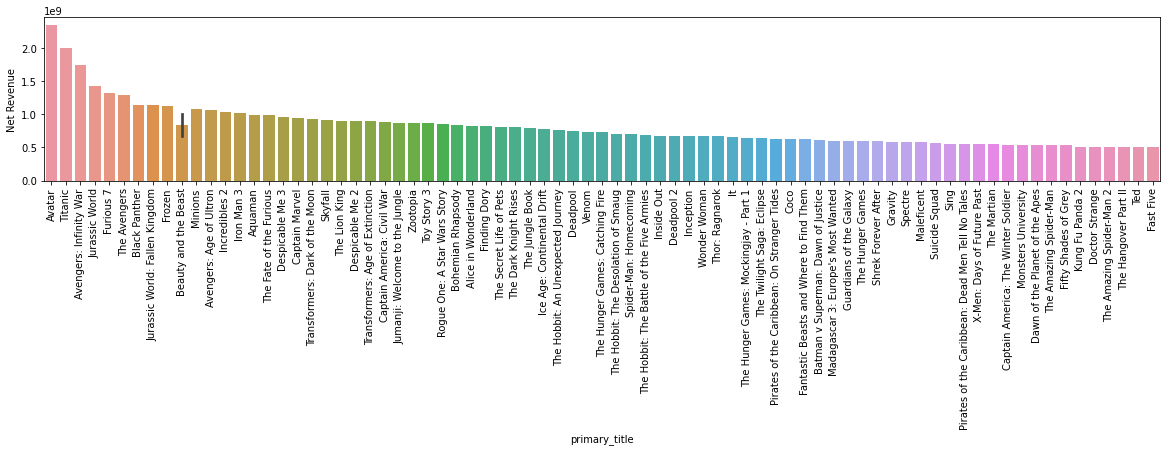

In [28]:
# bar plot for average rating of top 100 movies 
plt.figure(figsize = (20,3))
plt.xticks(rotation = 90)
sns.barplot(x=top_100_rev.primary_title, y=top_100_rev.net_revenue)
plt.ylabel('Net Revenue')
plt.show();


## Director Top 100 Movies Based On Revenue

In [29]:
# Merge top_100_rev and directors into one dataframe, 
top_100_dir = pd.merge(top_100_rev, directors, how='inner', on='movie_id')
top_100_dir = pd.merge(top_100_dir, persons, how='inner', on='person_id')
top_100_dir.drop_duplicates(subset=['movie_id'], inplace=True)
top_rev_dir_counts = top_100_dir.primary_name.value_counts().iloc[:25]
                                                                
top_rev_dir_counts

Anthony Russo        3
Pierre Coffin        3
Peter Jackson        3
Sam Mendes           2
Francis Lawrence     2
Jon Favreau          2
Bryan Singer         2
Joss Whedon          2
Lee Unkrich          2
Christopher Nolan    2
Michael Bay          2
James Wan            2
Marc Webb            2
Andy Muschietti      1
David Yates          1
Rob Marshall         1
Jon Watts            1
Seth MacFarlane      1
Alastair Siddons     1
Taika Waititi        1
Joachim Rønning      1
Pete Docter          1
Jared Bush           1
Mike Mitchell        1
Brad Bird            1
Name: primary_name, dtype: int64

### Bar Graph of Director Count in Top 100 Movies Based On Revenue

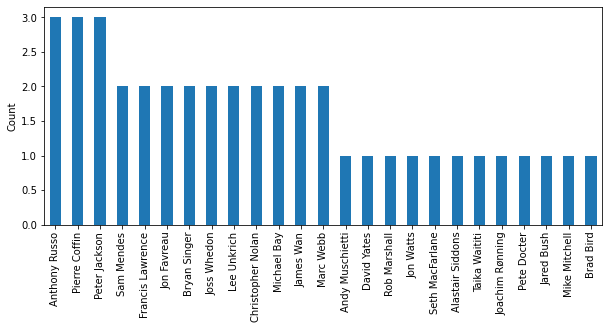

In [30]:
#plot of total times directors appeared in the top 100 movies based on net revenue
top_rev_dir_counts.plot(kind='bar', figsize=(10, 4), ylabel='Count');

### Net Revenue Associated With Directors in Top 100 Based On Net Revenue

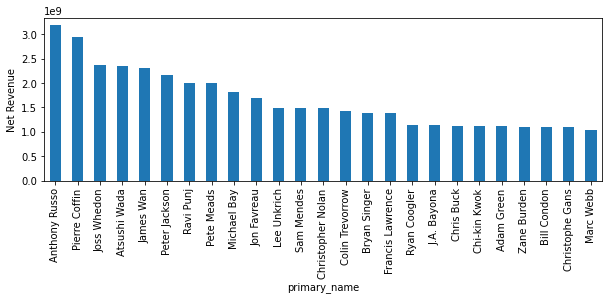

In [31]:
# Net Revenue of 100 movies grouped by director
top_dir_groupby = top_100_dir.groupby('primary_name').sum().sort_values(by='net_revenue', ascending=False)
top_dir_groupby = top_dir_groupby.net_revenue.iloc[:25]
# plot of net revenue of 100 movies grouped by director
top_dir_groupby.plot(kind='bar', figsize=(10, 3), ylabel='Net Revenue');

## Writers In Top 100 Movies Based On Revenue

In [32]:
# Merge top_100_rev and writers into one dataframe, 
top_100_writers = pd.merge(top_100_rev, writers, how='inner', on='movie_id')
top_100_writers = pd.merge(top_100_writers, persons, how='inner', on='person_id')
top_100_writers.drop_duplicates(subset=['movie_id'], inplace=True)
top_rev_writer_counts = top_100_writers.primary_name.value_counts().iloc[:15]
top_rev_writer_counts

Stan Lee              9
Fran Walsh            3
Christopher Markus    3
Linda Woolverton      3
Chris Morgan          3
Neal Purvis           2
Brian Lynch           2
Cinco Paul            2
Ted Elliott           2
Ehren Kruger          2
Rhett Reese           2
Rick Jaffa            2
Jennifer Lee          2
Suzanne Collins       2
Chase Palmer          1
Name: primary_name, dtype: int64

### Writer Count in Top 100 Movies Based On Revenue

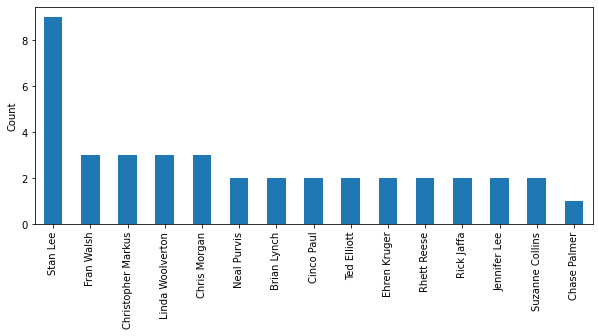

In [33]:
#plot of total times writers appeared in the top 100 movies based on net revenue
top_rev_writer_counts.plot(kind='bar', figsize=(10, 4), ylabel='Count');

### Net Revenue Associated With Each Writer In Top 100 Movies Based On Revenue

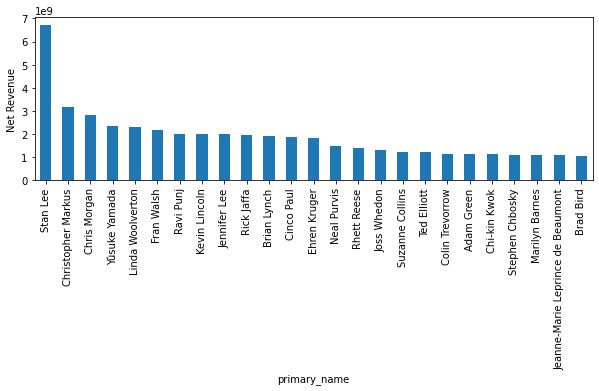

In [34]:
# Net Revenue of 100 movies grouped by writer
top_writer_groupby = top_100_writers.groupby('primary_name').sum().sort_values(by='net_revenue', ascending=False)
top_writer_groupby = top_writer_groupby.net_revenue.iloc[:25]
# plot of net revenue of 100 movies grouped by writer
top_writer_groupby.plot(kind='bar', figsize=(10, 3), ylabel='Net Revenue');

## Actors In Top 100 Movies Based On Net Revenue

In [35]:
# Merging principals and persons tables to obtain actor information
top_100_princ = pd.merge(top_100_rev, principals, how="inner", on='movie_id')
principals_rev = pd.merge(top_100_princ, persons, how="inner", on='person_id')
# Filtering for Actors
top_100_actors = principals_rev[(principals_rev.category == 'actress') | (principals_rev.category == 'actor')]
top_rev_actor_counts = top_100_actors.primary_name.value_counts().iloc[:25]
top_rev_actor_counts

Robert Downey Jr.     6
Chris Evans           5
Scarlett Johansson    4
Vin Diesel            4
Dwayne Johnson        4
Ian McKellen          4
Richard Armitage      3
Martin Freeman        3
Chris Pratt           3
Chris Hemsworth       3
Mark Ruffalo          3
Jennifer Lawrence     3
Josh Gad              3
Léa Seydoux           3
Kristen Wiig          3
Liam Hemsworth        3
Josh Hutcherson       3
Johnny Depp           3
Geoffrey Rush         2
Morena Baccarin       2
Kevin Hart            2
Steve Carell          2
Mark Wahlberg         2
Paul Walker           2
André Dussollier      2
Name: primary_name, dtype: int64

### Count Of Actors In Top 100 Movies Based On Net Revenue

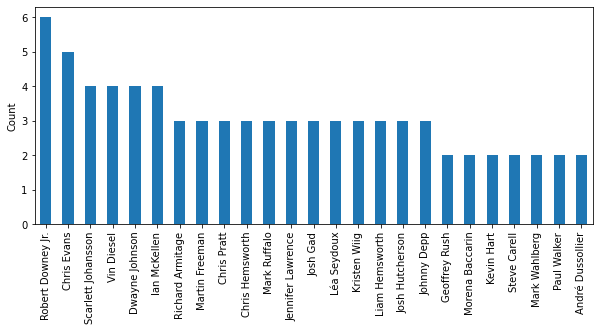

In [36]:
#plot of total times writers appeared in the top 100 movies based on net revenue
top_rev_actor_counts.plot(kind='bar', figsize=(10, 4), ylabel='Count');

### Net Revenue Associated With Each Actor In Top 100 Movies Based On Net Revenue

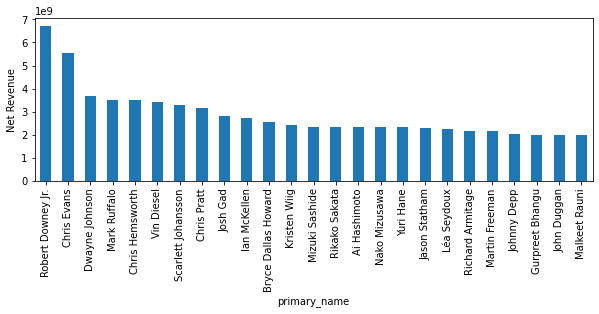

In [37]:
# Net Revenue of 100 movies grouped by writer
top_actor_groupby = top_100_actors.groupby('primary_name').sum().sort_values(by='net_revenue', ascending=False)
top_actor_groupby = top_actor_groupby.net_revenue.iloc[:25]
# plot of net revenue of 100 movies grouped by writer
top_actor_groupby.plot(kind='bar', figsize=(10, 3), ylabel='Net Revenue');

## Final Graphs

### Directors

#### Director Counts

In [38]:
top_rev_dir_df = top_rev_dir_counts.to_frame()
top_pop_dir_df = top_pop_director_counts.to_frame()
#Concatenate the two results together
top_director_counts = pd.merge(top_pop_dir_df, top_rev_dir_df, how="outer", left_index=True, right_index=True)
#Change all null values to zero to represent that there are none in the top 100 movies in that category
top_director_counts = top_director_counts.fillna(0)
# Reset Index for easier plotting
top_director_counts.reset_index(inplace=True)
#Renaming the column names to reflect which came from the rating results and the revenue results
top_director_counts.rename(columns= {'index': 'Directors', 'primary_name_x' :'Top 100 Movies Based on Rating', 'primary_name_y' :'Top 100 Movies Based on Net Revenue'}, inplace=True)
top_director_counts.sort_values(by=['Top 100 Movies Based on Rating', 'Top 100 Movies Based on Net Revenue'] , ascending=False, inplace=True)
top_director_counts.head()

,Directors,Top 100 Movies Based on Rating,Top 100 Movies Based on Net Revenue
3,Anthony Russo,4.0,3.0
6,Christopher Nolan,4.0,2.0
29,Peter Jackson,3.0,3.0
25,Matthew Vaughn,3.0,0.0
21,Joss Whedon,2.0,2.0


C:\Users\chrchristensen\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1373: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


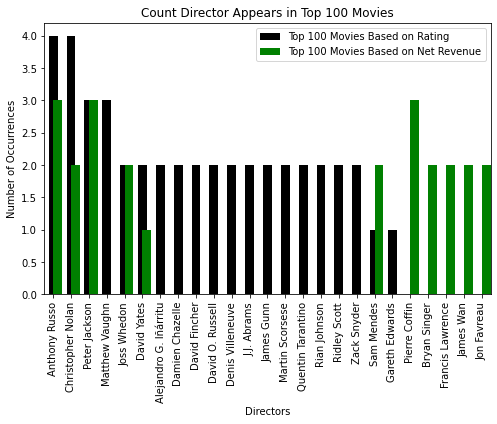

In [39]:
#Plot the count of revenue and rating in each genre side by side to see which genres are the most popular and most profitable
top_director_counts.iloc[:25].plot(kind='bar', 
                                   x='Directors', 
                                   title='Count Director Appears in Top 100 Movies', 
                                   color = ['Black','Green'],
                                   alpha=1,
                                   figsize=(8, 5),
                                   Width=.5,
                                   ylabel='Number of Occurrences',
                                   xlabel='Directors');


#### Revenue Associated With Each Director

C:\Users\chrchristensen\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1373: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


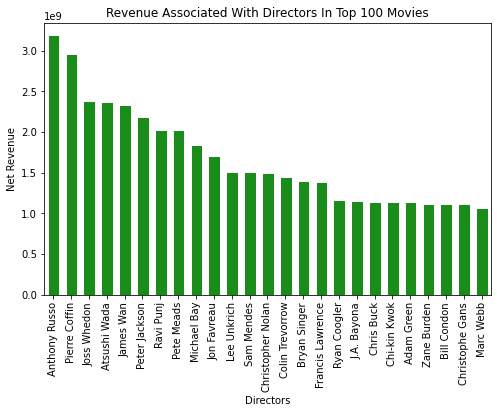

In [54]:
top_rev_director = top_dir_groupby
plt.figure(figsize = (20,3))
plt.xticks(rotation = 90)
top_rev_director.plot(kind='bar', 
                      title='Revenue Associated With Directors In Top 100 Movies', 
                      figsize=(8, 5), 
                      xlabel = 'Directors', 
                      ylabel='Net Revenue', 
                      color='Green', 
                      alpha=.9,
                      Width=.6);

### Writers

In [41]:
top_rev_writer_df = top_rev_writer_counts.to_frame()
top_pop_writer_df = top_pop_writer_counts.to_frame()
#Concatenate the two results together
top_writer_counts = pd.merge(top_pop_writer_df, top_rev_writer_df, how="outer", left_index=True, right_index=True)
#Change all null values to zero to represent that there are none in the top 100 movies in that category
top_writer_counts = top_writer_counts.fillna(0)
# Reset Index for easier plotting
top_writer_counts.reset_index(inplace=True)
#Renaming the column names to reflect which came from the rating results and the revenue results
top_writer_counts.rename(columns= {'index': 'Writers', 'primary_name_x' :'Top 100 Movies Based on Rating', 'primary_name_y' :'Top 100 Movies Based on Net Revenue'}, inplace=True)
top_writer_counts.sort_values(by=['Top 100 Movies Based on Rating', 'Top 100 Movies Based on Net Revenue'] , ascending=False, inplace=True)
top_writer_counts.head()

,Writers,Top 100 Movies Based on Rating,Top 100 Movies Based on Net Revenue
25,Stan Lee,13.0,9.0
3,Christopher Markus,6.0,3.0
4,Christopher Nolan,5.0,0.0
19,Michael Arndt,4.0,0.0
12,Fran Walsh,3.0,3.0


C:\Users\chrchristensen\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1373: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


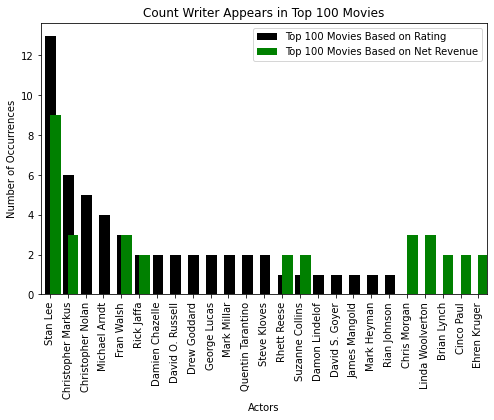

In [42]:
#Plot the count of revenue and rating in each genre side by side to see which genres are the most popular and most profitable
top_writer_counts.iloc[:25].plot(kind='bar', 
                       x='Writers', 
                       title='Count Writer Appears in Top 100 Movies', 
                       color = ['Black','Green'],
                       alpha=1,
                       figsize=(8, 5),
                       Width=.6,
                       ylabel='Number of Occurrences',
                       xlabel='Actors');


#### Revenue Associated With Each Writer

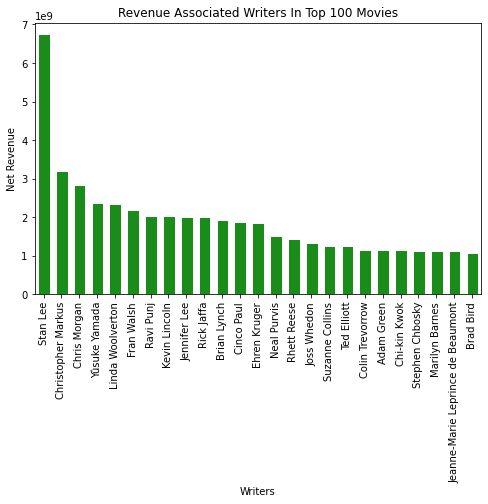

In [53]:
top_rev_writer = top_writer_groupby
top_rev_writer.plot(kind='bar', 
                      title='Revenue Associated Writers In Top 100 Movies', 
                      figsize=(8, 5), 
                      xlabel = 'Writers', 
                      ylabel='Net Revenue', 
                      color='Green', 
                      alpha=.9,
                      Width=.6);

### Actors

In [44]:
top_rev_actors_df = top_rev_actor_counts.to_frame()
top_pop_actors_df = top_pop_actor_counts.to_frame()
#Concatenate the two results together
top_actor_counts = pd.merge(top_pop_actors_df, top_rev_actors_df, how="outer", left_index=True, right_index=True)
#Change all null values to zero to represent that there are none in the top 100 movies in that category
top_actor_counts = top_actor_counts.fillna(0)
# Reset Index for easier plotting
top_actor_counts.reset_index(inplace=True)
#Renaming the column names to reflect which came from the rating results and the revenue results
top_actor_counts.rename(columns= {'index': 'Actors', 'primary_name_x' :'Top 100 Movies Based on Rating', 'primary_name_y' :'Top 100 Movies Based on Net Revenue'}, inplace=True)
top_actor_counts.sort_values(by=['Top 100 Movies Based on Rating', 'Top 100 Movies Based on Net Revenue'] , ascending=False, inplace=True)
top_actor_counts.head()

,Actors,Top 100 Movies Based on Rating,Top 100 Movies Based on Net Revenue
32,Robert Downey Jr.,8.0,6.0
22,Leonardo DiCaprio,6.0,0.0
13,Ian McKellen,3.0,4.0
6,Chris Pratt,3.0,3.0
1,Ben Affleck,3.0,0.0


In [52]:
#Plot the count of revenue and rating in each genre side by side to see which genres are the most popular and most profitable
top_actor_counts.iloc[:25].plot(kind='bar', 
                       x='Actors', 
                       title='Count Writer Appears in Top 100 Movies', 
                       color = ['Black','Green'],
                       alpha=1,
                       figsize=(8, 5),
                       Width=.6,
                       ylabel='Number of Occurrences',
                       xlabel='Actors');

SyntaxError: keyword argument repeated (<ipython-input-52-c71e622748f5>, line 11)

#### Revenue Associated With Each Actor

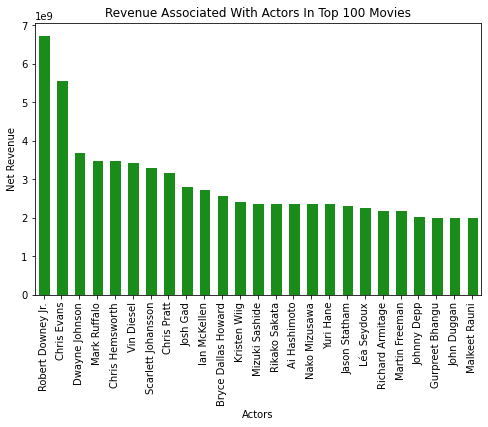

In [51]:
top_rev_actor = top_actor_groupby
top_rev_actor.plot(kind='bar', 
                      title='Revenue Associated With Actors In Top 100 Movies', 
                      figsize=(8, 5), 
                      xlabel = 'Actors', 
                      ylabel='Net Revenue', 
                      color='Green', 
                      alpha=.9,
                      Width=.6);